# Driver Laptimes Development Over A Race
---

In [10]:
import sys
import pandas as pd
import seaborn as sns
import fastf1
import fastf1.plotting
import matplotlib.pyplot as plt

sys.path.append("../..")
from common import Config

pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)

In [22]:
fastf1.plotting.setup_mpl(misc_mpl_mods=True)  # The misc_mpl_mods option enables minor grid lines which clutter the plot
fastf1.Cache.enable_cache(Config.FASTF1_CACHE_DIR)
fastf1.set_log_level('WARNING')

## Loading Session Data

In [8]:
session = fastf1.get_session(2023, 'Abu Dhabi', 'Race')
session.load()

print(f"Session Loaded: {session}")

Session Loaded: 2023 Season Round 22: Abu Dhabi Grand Prix - Race


In [32]:
# Get all the laps for each driver
driver_list = ['VER', 'LEC', 'RUS', 'NOR']
driver_colour_mapping = {k: fastf1.plotting.DRIVER_COLORS[v] for k, v in fastf1.plotting.DRIVER_TRANSLATE.items()}

In [44]:
fastf1.plotting.COMPOUND_COLORS

{'SOFT': '#da291c',
 'MEDIUM': '#ffd12e',
 'HARD': '#f0f0ec',
 'INTERMEDIATE': '#43b02a',
 'WET': '#0067ad',
 'UNKNOWN': '#00ffff',
 'TEST-UNKNOWN': '#434649'}

Text(0.5, 0.98, 'FORMULA 1 ETIHAD AIRWAYS ABU DHABI GRAND PRIX 2023  (Race)')

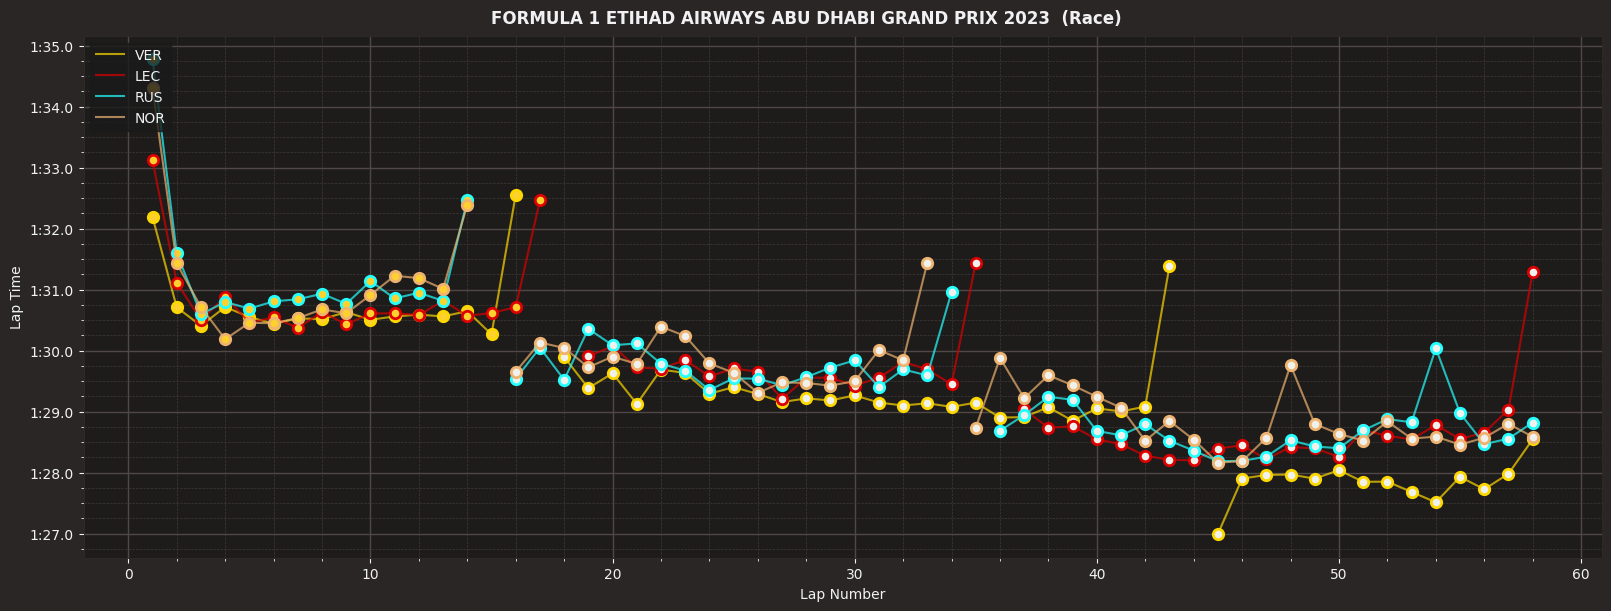

In [53]:
fig, ax = plt.subplots(figsize=(16, 6), constrained_layout=True)
for driver in driver_list:
    driver_laps = session.laps.pick_driver(driver)
    driver_laps = driver_laps.query("PitOutTime.isna()")  # Remove pit laps
    for i, stint in enumerate(driver_laps['Stint'].unique()):
        driver_stint_laps = driver_laps.query(f"Stint == {stint}")
        stint_compound = driver_stint_laps['Compound'].values[1]
        ax.plot(driver_stint_laps['LapNumber'], driver_stint_laps['LapTime'], 
                color=driver_colour_mapping[driver],
                label=driver if i == 0 else '__nolegend__', alpha=0.7)
        ax.plot(driver_stint_laps['LapNumber'], driver_stint_laps['LapTime'], 
                marker='.', markersize=15, markeredgewidth=2,
                markerfacecolor=fastf1.plotting.COMPOUND_COLORS[stint_compound],
                color=driver_colour_mapping[driver],
                linestyle='none')
ax.set_ylabel('Lap Time')
ax.set_xlabel('Lap Number')
ax.legend(loc='upper left')
fig_title = f"{session.session_info['Meeting']['OfficialName']} ({session.session_info['Type']})"
fig.suptitle(fig_title, fontweight='bold')

In [17]:
driver_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
232,0 days 01:03:59.166000,NOR,4,0 days 00:01:34.309000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:38.613000,0 days 00:00:34.209000,NaT,0 days 01:03:25.019000,0 days 01:03:59.362000,288.0,284.0,212.0,309.0,False,MEDIUM,1.0,True,McLaren,0 days 01:02:24.519000,2023-11-26 13:03:25.644,1,4.0,False,,False,False
233,0 days 01:05:30.596000,NOR,4,0 days 00:01:31.430000,2.0,1.0,NaT,NaT,0 days 00:00:18.382000,0 days 00:00:38.823000,0 days 00:00:34.225000,0 days 01:04:17.492000,0 days 01:04:56.315000,0 days 01:05:30.540000,290.0,280.0,212.0,317.0,True,MEDIUM,2.0,True,McLaren,0 days 01:03:59.166000,2023-11-26 13:05:00.291,1,4.0,False,,False,True
234,0 days 01:07:01.310000,NOR,4,0 days 00:01:30.714000,3.0,1.0,NaT,NaT,0 days 00:00:18.378000,0 days 00:00:38.212000,0 days 00:00:34.124000,0 days 01:05:48.918000,0 days 01:06:27.130000,0 days 01:07:01.254000,282.0,300.0,212.0,300.0,True,MEDIUM,3.0,True,McLaren,0 days 01:05:30.596000,2023-11-26 13:06:31.721,1,4.0,False,,False,True
235,0 days 01:08:31.498000,NOR,4,0 days 00:01:30.188000,4.0,1.0,NaT,NaT,0 days 00:00:18.027000,0 days 00:00:38.157000,0 days 00:00:34.004000,0 days 01:07:19.281000,0 days 01:07:57.438000,0 days 01:08:31.442000,290.0,292.0,210.0,321.0,True,MEDIUM,4.0,True,McLaren,0 days 01:07:01.310000,2023-11-26 13:08:02.435,1,3.0,False,,False,True
236,0 days 01:10:01.954000,NOR,4,0 days 00:01:30.456000,5.0,1.0,NaT,NaT,0 days 00:00:18.047000,0 days 00:00:38.532000,0 days 00:00:33.877000,0 days 01:08:49.489000,0 days 01:09:28.021000,0 days 01:10:01.898000,287.0,298.0,209.0,303.0,False,MEDIUM,5.0,True,McLaren,0 days 01:08:31.498000,2023-11-26 13:09:32.623,1,3.0,False,,False,True
237,0 days 01:11:32.404000,NOR,4,0 days 00:01:30.450000,6.0,1.0,NaT,NaT,0 days 00:00:18.186000,0 days 00:00:38.522000,0 days 00:00:33.742000,0 days 01:10:20.084000,0 days 01:10:58.606000,0 days 01:11:32.348000,NaN,305.0,209.0,308.0,False,MEDIUM,6.0,True,McLaren,0 days 01:10:01.954000,2023-11-26 13:11:03.079,1,3.0,False,,False,True
238,0 days 01:13:02.937000,NOR,4,0 days 00:01:30.533000,7.0,1.0,NaT,NaT,0 days 00:00:18.172000,0 days 00:00:38.468000,0 days 00:00:33.893000,0 days 01:11:50.520000,0 days 01:12:28.988000,0 days 01:13:02.881000,286.0,301.0,210.0,308.0,False,MEDIUM,7.0,True,McLaren,0 days 01:11:32.404000,2023-11-26 13:12:33.529,1,3.0,False,,False,True
239,0 days 01:14:33.613000,NOR,4,0 days 00:01:30.676000,8.0,1.0,NaT,NaT,0 days 00:00:18.172000,0 days 00:00:38.456000,0 days 00:00:34.048000,NaT,0 days 01:13:59.509000,0 days 01:14:33.557000,NaN,301.0,208.0,309.0,False,MEDIUM,8.0,True,McLaren,0 days 01:13:02.937000,2023-11-26 13:14:04.062,1,3.0,False,,False,True
240,0 days 01:16:04.226000,NOR,4,0 days 00:01:30.613000,9.0,1.0,NaT,NaT,0 days 00:00:18.159000,0 days 00:00:38.481000,0 days 00:00:33.973000,0 days 01:14:51.716000,0 days 01:15:30.197000,0 days 01:16:04.170000,NaN,305.0,209.0,311.0,False,MEDIUM,9.0,True,McLaren,0 days 01:14:33.613000,2023-11-26 13:15:34.738,1,3.0,True,TRACK LIMITS AT TURN 1 LAP 9,False,True
241,0 days 01:17:35.138000,NOR,4,0 days 00:01:30.912000,10.0,1.0,NaT,NaT,0 days 00:00:18.269000,0 days 00:00:38.929000,0 days 00:00:33.714000,0 days 01:16:22.439000,0 days 01:17:01.368000,0 days 01:17:35.082000,284.0,300.0,209.0,302.0,False,MEDIUM,10.0,True,McLaren,0 days 01:16:04.226000,2023-11-26 13:17:05.351,1,3.0,False,,False,True
